(16, 16, 16, 20, 10, 1)
t= 3000.0
y= 15000.0
y= 7000.0


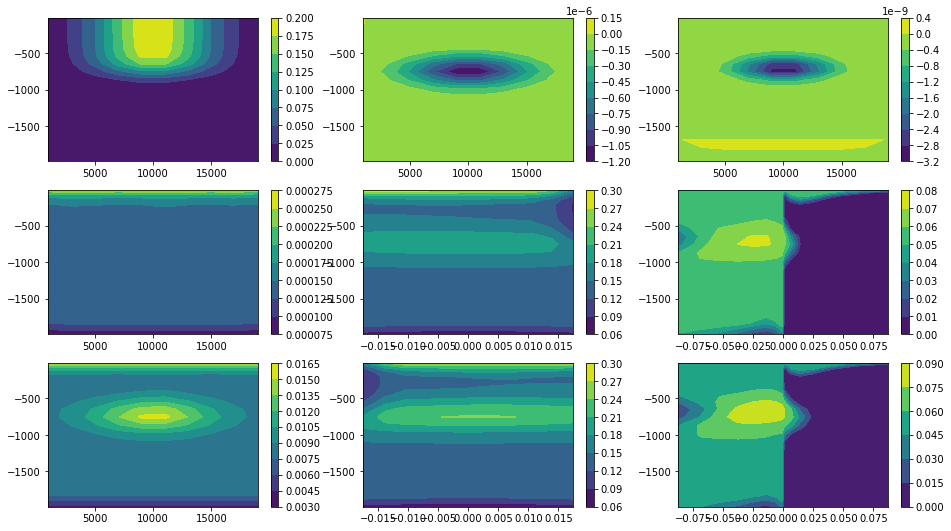

In [43]:
import numpy as np
import pylab as plt


from netCDF4 import Dataset as NF

ifid=NF('snap6D.cdf',mode='r')
mt = ifid.variables['mt'][:]
zt = ifid.variables['zt'][:]
yt = ifid.variables['yt'][:]
lt = ifid.variables['lt'][:]
it = 3
E =  ifid.variables['E'][it,:]
meanfl =  ifid.variables['meanfl'][it,:]
ifid.close()

ifid=NF('snap3D.cdf',mode='r')
U = ifid.variables['U'][:]
E_int =  ifid.variables['E'][it,:]
meanfl_int =  ifid.variables['meanfl'][it,:]
diss_ls   =  ifid.variables['diss_ls'][it,:]
diss_le   =  ifid.variables['diss_le'][it,:]
diss_ms   =  ifid.variables['diss_ms'][it,:]
diss_me   =  ifid.variables['diss_me'][it,:]

t  = ifid.variables['Time'][:]
bfl_ms =  ifid.variables['bflux_ms'][:]
bfl_me =  ifid.variables['bflux_me'][:]
bfl_ls =  ifid.variables['bflux_ls'][:]
bfl_le =  ifid.variables['bflux_le'][:]
mflint =  ifid.variables['mflint'][:]

ifid.close()


x,k=0,0
dm,dl = mt[1]-mt[0],lt[1]-lt[0]

nm,nl,nk,nz,ny,nx = E.shape
print (E.shape)

print ("t=",t[it])

plt.figure(figsize=(16,9))


ax = plt.subplot(3,3,1)
co = plt.contourf(yt,zt, U[:,:,x]   ) 
plt.colorbar(co)


ax = plt.subplot(3,3,2)
co = plt.contourf(yt,zt, np.sum( np.sum(meanfl[:,:,k,:,:,x],axis=0) , axis=0) *dm*dl   ) 

#co = plt.contourf(yt,zt, diss_le[:,:,x]-diss_ls[:,:,x]+diss_me[:,:,x]-diss_ms[:,:,x]  ) 
plt.colorbar(co)
#ax.plot(t,mflint,'k')
#ax.plot(t,fint,'b')

ax = plt.subplot(3,3,3)
co = plt.contourf(yt,zt, meanfl_int[:,:,x] ) 
plt.colorbar(co)

#ax.plot(t,mflint,'k')

#ax.plot(t,bfl_ms,'r')
#ax.plot(t,bfl_me,'r--')
#ax.plot(t,bfl_ls,'b')
#ax.plot(t,bfl_le,'b--')
#ax.plot(t,mflint,'k')
#ax.plot(t,fint,'m')

y = ny//2+2
#y = ny-1
print ("y=",yt[y])


ax = plt.subplot(3,3,4)
#co = plt.contourf(yt,zt, np.sum( np.sum(E[:,:,k,:,:,x],axis=0) , axis=0) *dm*dl   ) 
co = plt.contourf(yt,zt, E_int[:,:,x]  )
plt.colorbar(co)

ax = plt.subplot(3,3,5)
co = plt.contourf(lt,zt, np.sum(E[:,:,k,:,y,x],axis=0).T *dm  ) 
plt.colorbar(co)

ax = plt.subplot(3,3,6)
co = plt.contourf(mt,zt, np.sum(E[:,:,k,:,y,x],axis=1).T *dl  ) 
plt.colorbar(co)

y=ny//2-2
print ("y=",yt[y])
ax = plt.subplot(3,3,7)
co = plt.contourf(yt,zt, np.sum( np.sum(E[:,:,k,:,:,x],axis=0) , axis=0) *dm*dl -E_int[:,:,x]    ) 
plt.colorbar(co)

ax = plt.subplot(3,3,8)
co = plt.contourf(lt,zt, ( np.sum(E[:,:,k,:,y,x],axis=0).T *dm )  ) 
#co = plt.contourf(lt,zt, (E[3,:,k,:,y,x]).T   ) 
plt.colorbar(co)

ax = plt.subplot(3,3,9)
co = plt.contourf(mt,zt, np.sum(E[:,:,k,:,y,x],axis=1).T *dl  ) 
plt.colorbar(co)

plt.show()